*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

# Random forest with Scikit-learn

Let's come back to our beloved Titanic disaster dataset, and implement a Random Forest classifier to identify the survivors!.

<img src="img/titanic.jpg" width="600">

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Let's read the dataset _titanic.csv_ using `read_csv` function.

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


We need to convert the categorical value _sex_ to a numerical variable. Use the pandas method `get_dummies` to take care of this. Check https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [3]:
# The features vector
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']

X = pd.get_dummies(titanic[titanic_features])
X.head()

,age,sibsp,parch,fare,sex_female,sex_male
0,29.0000,0,0,211.3375,1,0
1,0.9167,1,2,151.5500,0,1
2,2.0000,1,2,151.5500,1,0
3,30.0000,1,2,151.5500,0,1
4,25.0000,1,2,151.5500,1,0


Replace the missing values with the mean of each of the attributes. Use pandas' `fillna` for this purpose: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [4]:
X = X.fillna(X.mean())

Create the label vector `y` using the feature _survived_:

In [5]:
y = titanic['survived']

Let's create random forests of different sizes and obtain metrics for each of the models. For this: 
* Use random forest classifier with max tree depth of 3 (and random_state=0). Check out the `RandomForestClassifier` function and documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Train a classifier by variating the number of trees from 1 to 30 (N).
* For each model, estimate the precision and recall metrics with cross validation (10-folds). Check out the `cross_val_score` function and documentation  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* For each model, estimate the f-1 score by using the formula involving precision and recall.

In [6]:
number_trees = [n for n in range(1, 31)]
precision_scores = []
recalls_scores = []
f1_scores = []

for nt in number_trees:
    clf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=nt)
    clf.fit(X, y)
    precision = cross_val_score(clf, X, y, cv=10, scoring="precision")
    precision_scores.append(precision.mean())
    recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
    recalls_scores.append(recall.mean())
    f1 = 2*((precision*recall)/(precision+recall))
    f1_scores.append(f1.mean())

Plot the precision, recall and f-1 score curves for different values of N. Use good visualization practices.

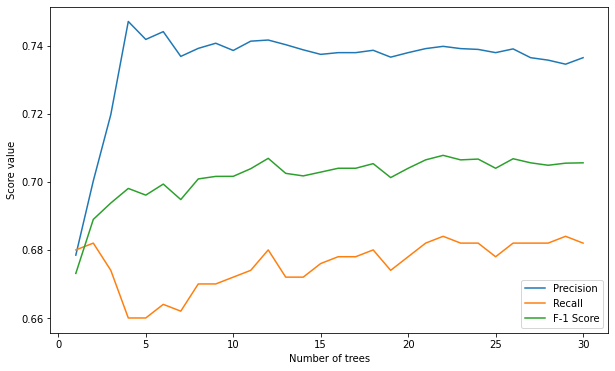

In [7]:
fig, ax = plt.subplots(1, figsize=(10,6))

ax.plot(number_trees, precision_scores, label="Precision")
ax.plot(number_trees, recalls_scores, label="Recall")
ax.plot(number_trees, f1_scores, label="F-1 Score")

ax.set_ylabel("Score value")
ax.set_xlabel("Number of trees")
ax.legend()

We can observe how initially the F-1 score increases when incrementing the number of trees, and then it tends to stabilize. 